In [2]:
# Install the requirements, pandas needs to be at least 0.19.2 for URL crawl.
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas  as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
sns.set()

In [20]:
# download the dataset.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, sep=" ")

# set the column names.
df.columns = ["chk_acct", "duration", "credit_his", "purpose", 
"amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
"present_resid", "property", "age", "other_install", "housing", "n_credits", 
"job", "n_people", "telephone", "foreign", "response"]

# Change response type from 1=default risk and 2=no-default risk to 1=default risk and 0=no-default risk
df["response"] = df["response"]-1

In [21]:
# show the first 5 examples.
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0


In [26]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [27]:
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,1,29,2,4,770,0,2,1,1,0,...,0,3,2,1,0,2,0,0,0,1
1,3,8,4,7,390,0,3,1,2,0,...,0,30,2,1,0,1,1,0,0,0
2,0,26,2,3,848,0,3,1,2,2,...,1,26,2,2,0,2,1,0,0,0
3,0,17,3,0,734,0,2,2,2,0,...,3,34,2,2,1,2,1,0,0,1
4,3,23,2,7,869,4,2,1,2,0,...,3,16,2,2,0,1,1,1,0,0


In [30]:
df.describe()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.578579,13.729730,2.543544,3.276276,448.246246,1.102102,2.382382,1.971972,1.681682,0.145145,...,1.359359,16.489489,1.674675,0.928929,0.406406,1.903904,0.155155,0.403403,0.037037,0.300300
std,1.257276,7.517316,1.082682,2.740578,264.582560,1.578153,1.207828,1.118802,0.708363,0.477923,...,1.049854,11.256067,0.705879,0.531525,0.577639,0.653934,0.362234,0.490826,0.188947,0.458618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2.000000,1.000000,219.500000,0.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,8.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.000000,2.000000,3.000000,440.000000,0.000000,2.000000,2.000000,2.000000,0.000000,...,1.000000,14.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,17.000000,4.000000,4.000000,676.500000,2.000000,4.000000,3.000000,2.000000,0.000000,...,2.000000,23.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,32.000000,4.000000,9.000000,920.000000,4.000000,4.000000,3.000000,3.000000,2.000000,...,3.000000,52.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


              amount  property   duration   housing
response                                           
0         432.625179  1.261803  12.670959  0.935622
1         484.643333  1.586667  16.196667  0.913333


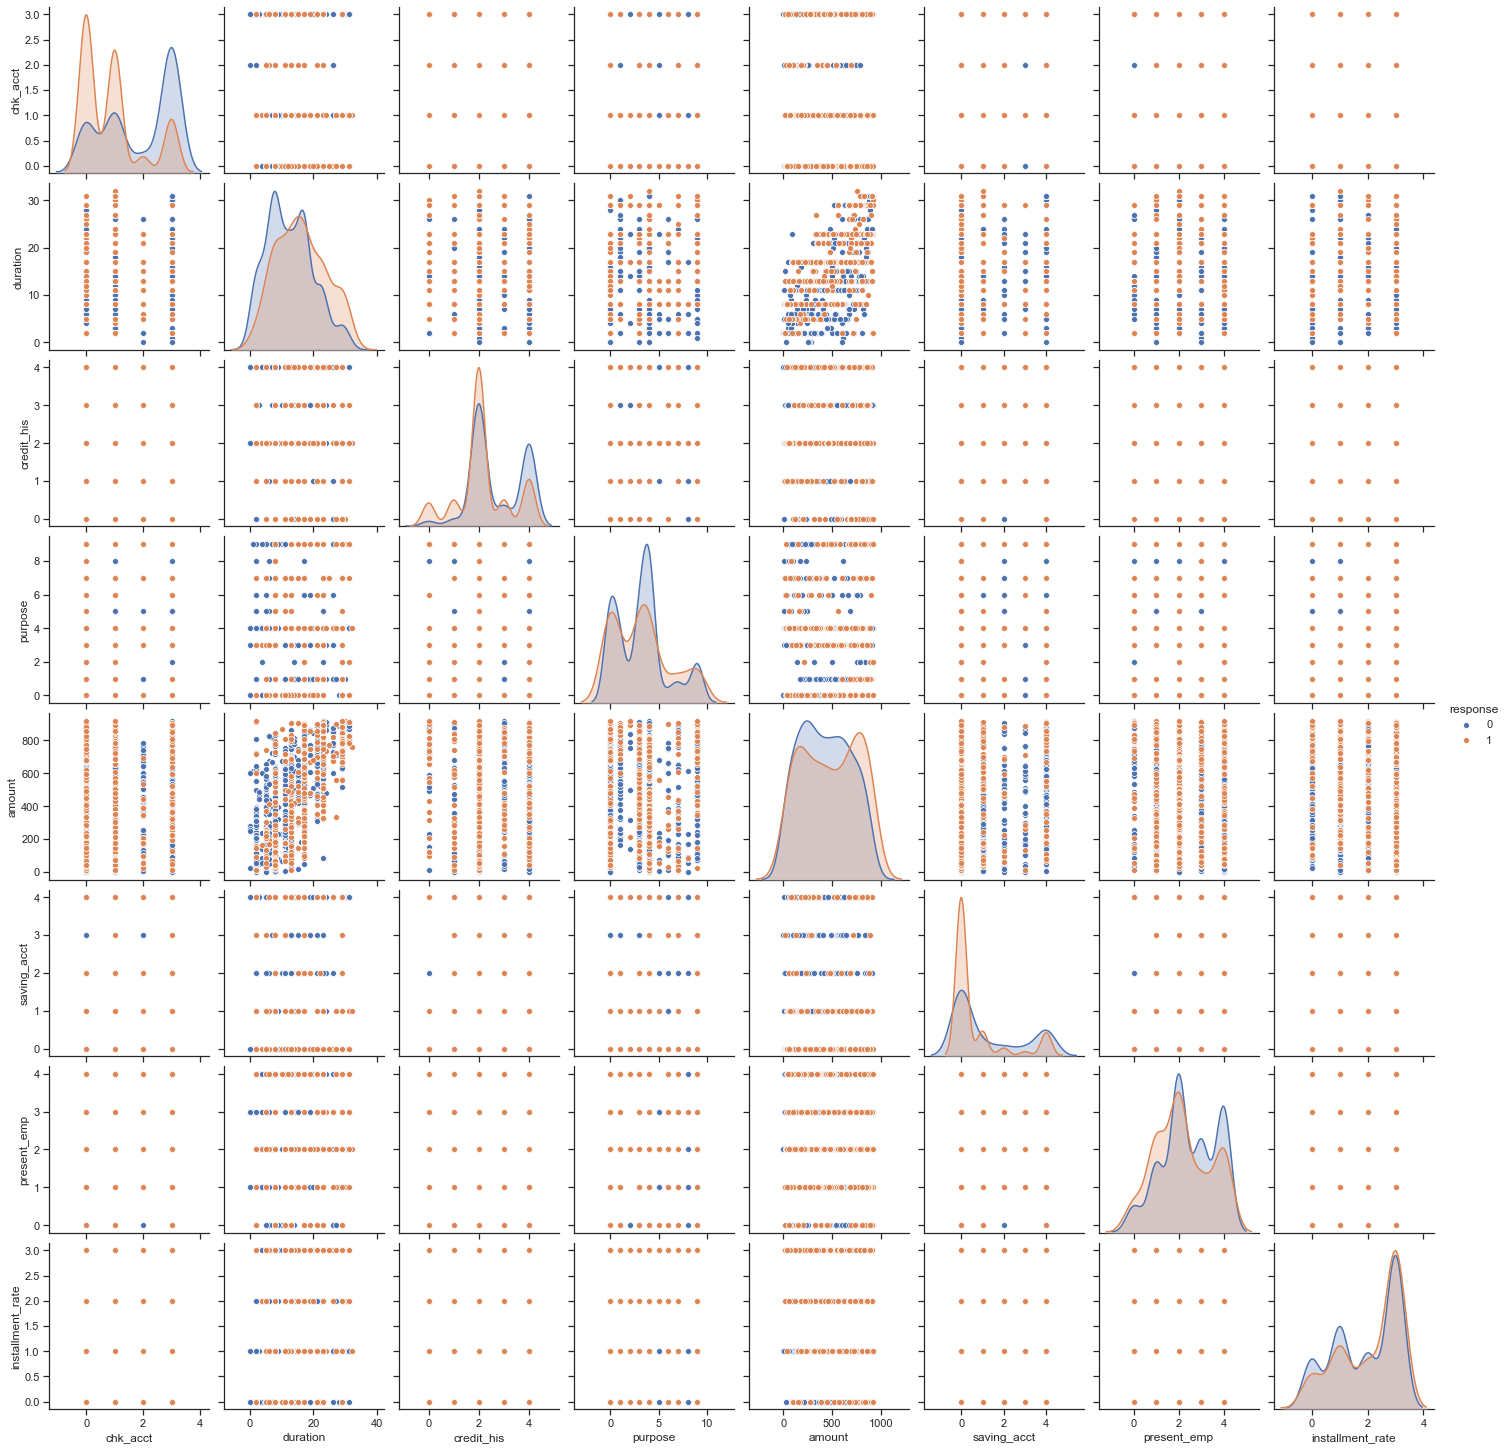

In [34]:
# making a plot grouped by the class to show the seperability of the classes via their features.
groupedData = df.groupby("response")
meanValues  = groupedData[['amount', 'property', 'duration', 'housing']].mean()
print(meanValues.to_string())

sns.set(style="ticks")
sns.pairplot(df[["chk_acct",	"duration",  "credit_his",	"purpose",	"amount",	"saving_acct",	"present_emp",	"installment_rate", "response"]], hue="response")

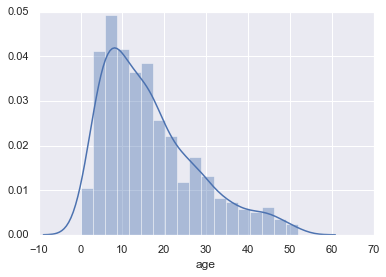

In [42]:
# plot the ages.
sns.distplot(df['age'])

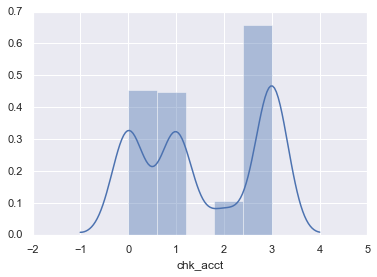

In [43]:
# plot the chk_acct variable
sns.distplot(df['chk_acct'])

In [47]:
# create train test split.
y = df['response']
X = df.drop(['response'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

c:\Users\Marc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


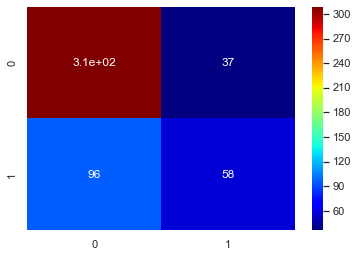

In [60]:
# Logistisc Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
proba = clf.predict(X_test)
cm = confusion_matrix(y_test.T.tolist(), proba)

sns.heatmap(cm, annot=True, cmap="jet")

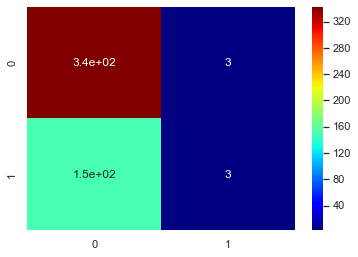

In [66]:
# Random Forest

clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
proba = clf.predict(X_test)
cm = confusion_matrix(y_test.T.tolist(), proba)

sns.heatmap(cm, annot=True, cmap="jet")

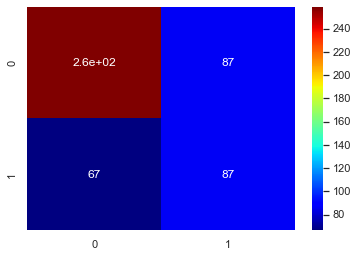

In [67]:
# Decision Tree
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

proba = clf.predict(X_test)
cm = confusion_matrix(y_test.T.tolist(), proba)

sns.heatmap(cm, annot=True, cmap="jet")